# 回帰モデル

statsmodelsでは線形回帰モデル
$$y=f(x_i)+e=\beta_0+\beta_1 x_1 +,\cdots,+ e $$
の切片($\beta_0$)と回帰係数($\beta_i$)を

|日本語|statsmodels||
|:-:|:-:|:-:|
|最小二乗法|OLS|
|加重最小二乗法|WLS|
|一般化最小二乗法|GLS|
|再帰的最小二乗法|Recursive LS|

という4つの方法により推定する。$x$は説明変数、$e$は誤差である。$y$は被説明変数で、$x$の線形結合としてモデル化される。最小二乗法によって得られるモデルがもっともらしくあるためには、誤差には

- 偏りがない。
- 分散は既知で一定である。
- 共分散は0である。
- 正規分布にしたがう。

という前提条件が課される。GLSは誤差の分散が一定ではない分散不均一性、誤差同士が相関をもつ自己相関をもつ誤差対処できるモデルで、WLSは分散不均一性を扱っていて、Recursive LSは自己相関をもつ誤差を扱っている。これらのモデルでは条件を満たせない誤差の問題をいろいろと調整をして、これらの条件を成り立たせることで回帰係数を推定している。

線形回帰というときには
1) パラメータに対して線形
という条件が課される。また、x(独立変数、説明変数)については
a) 確率変数ではなく固定値
b) 確率変数
の場合に分けられ、確率変数の場合にはxは誤差項と独立である必要がある。

$y$の分布を指数分布族として指定して、残差を任意の分布としたものとして[一般化線形モデル](https://qiita.com/innovation1005/items/8b8a2ca2176134692155)がある。これをさらに発展させたものとして

- [一般化推定方程式](https://qiita.com/innovation1005/items/42a64213ac725719c785)
- 一般化混合モデル
- [一般化加法モデル](https://qiita.com/innovation1005/items/cc3c4f7d17f9f2ddd2f5)

などがある。線形回帰ではOLSを用いるが、一般化線形モデルとその発展形では最尤法、またはそれに準じた方法を用いて回帰係数の推定を行う。

また、時間の経過とともに記録したデータを時系列データという。時系列データを扱うときには従属変数yと独立変数ｘがともに確率変数であるときがある。回帰モデルが独立変数の現在だけではなく、過去のデータも含むとき分布ラグモデルといい、説明変数が従属変数の過去の値からなるとき、分布ラグモデルに従属変数の過去の値を含むときには自己回帰モデル、または動学モデル(dynamic model)という。

同じ時点の異なるデータを集めたものをクロスデータとよぶ。このクロスデータを時系列データとしたものがパネルデータである。このようなデータを扱うのがパネルデータ分析である。

モデルがいくつかの回帰モデルからなるときには同時方程式モデルという。需要サイドのモデルと供給サイドのモデルと、それらの均衡を表現するモデルなどの場合である。また、このような問題は[ベクトル自己回帰モデル](https://qiita.com/innovation1005/items/b5333a939c0341b46ba9)または[ベクトル誤差修正モデル](https://qiita.com/innovation1005/items/d53d9ba4f9e8ee1832c6)で扱うこともできる。

時系列分析を扱うときにはその原系列がランダムウォークであるかどうかを判断する必要がる。ランダムウォークであれば1次の和分という。複数の1次の和分過程の線形結合が0次の和分過程であれば、それを共和分と呼ぶ。トレンドをもつ時系列の分析に役に立つ。[ベクトル誤差修正モデル](https://qiita.com/innovation1005/items/d53d9ba4f9e8ee1832c6)などを用いて問題に取り組む。

# 最小二乗法による推定
## 人工的に生成したデータでモデルを確認

$X$を説明変数、$y$を非説明変数とすると
$X=\beta_0+\beta_1 x$
とし
$y=X+e$
とする。$\beta$は係数で$e$はノイズである。

$\beta_0=1,\beta_1=0.1$としてとして人工データを生成し、そのデータを最小二乗法を用いて当てはめ、$\beta$を推定するという問題に取り組む。このようなアプローチは何か新しいモデルを学ぶときにはいつでも有効であり、学習の効率も良いと考える。

別に回帰分析を勉強するのは初めてではないので、頭の中にはいろいろな思いがある。それはどの程度役に立つのだろうかという疑問である。この例ではノイズは標準正規分布にしたがうとする。

初期化をする。

In [27]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)

つぎに人工データを生成する。この人工データの作り方であるが、Xはlinspaceを用いて作る。これは説明変数が確定した値であることを示している。また、y_trueも確定的な値である。確率変数になっているのはｙであり、これはy_trueにノイズを加えて確率変数にしている。

In [28]:
nsample = 100
x = np.linspace(0, 10, nsample)
X = sm.add_constant(x)
beta = np.array([1, 0.1])
y_true=np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.931
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0901
Time:                        16:03:17   Log-Likelihood:                -146.79
No. Observations:                 100   AIC:                             297.6
Df Residuals:                      98   BIC:                             302.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1732      0.211      5.571      0.0

サマリーレポートのもっとも上の二重線の下はデータに関する情報と推定したモデルの特性を示す情報が表示されている。
二番目の二重線から下には回帰係数に関する情報が表示されている。三番目の二重線の下には誤差項に関する情報が示されている。ここでいう誤差は
$y=E(y|x_i)+\epsilon$
の$\epsilon$のことであり、$E(y|x_i)$は推定された回帰係数を用いて得た$y$の期待値である。
結果をサマリーレポートとは別に出力することもできる。

Parameters:  [1.17316847 0.06228625]
R2:  0.029038651902007495


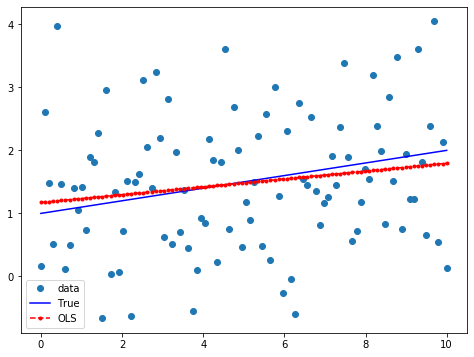

In [29]:
print('Parameters: ', res.params)
print('R2: ', res.rsquared)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

これぞ線形回帰という結果が得られた。線形の意味の通り、直線がありその周りを観測値がうまく散らばっている。

ついでに被説明変数の頻度図も描いてみよう。

(array([ 5.,  9., 16.,  9., 21., 14., 11.,  6.,  5.,  4.]),
 array([-0.65946391, -0.18898793,  0.28148805,  0.75196404,  1.22244002,
         1.692916  ,  2.16339198,  2.63386796,  3.10434395,  3.57481993,
         4.04529591]),
 <a list of 10 Patch objects>)

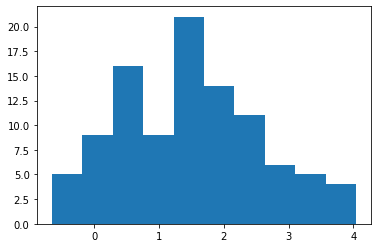

In [30]:
plt.hist(y)

([array([  0., 100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])],
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 Lists of Patches objects>)

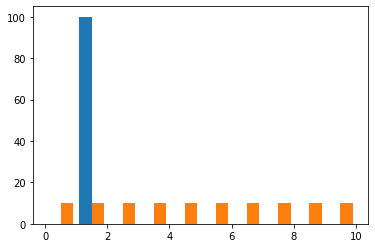

In [31]:
plt.hist(X)

(array([ 5.,  8., 16., 15., 22., 14.,  7.,  7.,  5.,  1.]),
 array([-2.15768251, -1.66427675, -1.17087099, -0.67746523, -0.18405946,
         0.3093463 ,  0.80275206,  1.29615782,  1.78956358,  2.28296934,
         2.77637511]),
 <a list of 10 Patch objects>)

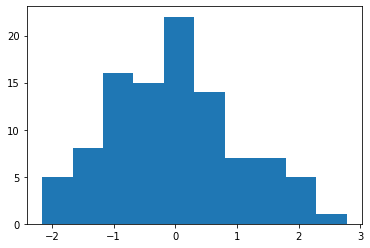

In [32]:
plt.hist(res.resid)

In [33]:
nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 0.1])
e = np.random.uniform(size=nsample)
X = sm.add_constant(x)
y_true=np.dot(X, beta)
y = y_true + e-0.5

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     92.02
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           9.28e-16
Time:                        16:03:19   Log-Likelihood:                -21.445
No. Observations:                 100   AIC:                             46.89
Df Residuals:                      98   BIC:                             52.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0158      0.060     16.895      0.0

こんどは説明変数と被説明変数の間の関係が非線形である場合について試してみよう。$X$を
$X=\beta_0+\beta_1 x + \beta_2 x^2$
とし、
$y=X+e$
とする。$\beta$は係数で$e$はノイズである。$\beta_0=1,\beta_1=0.1,\beta_2=10$として人工的にデータを生成し、そのデータについて最小二乗法を用いて$\beta$の推定を行う。eは正規乱数。

In [34]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.uniform(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e-0.5

# Fit and summary:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.786e+07
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          1.91e-295
Time:                        16:03:19   Log-Likelihood:                -13.200
No. Observations:                 100   AIC:                             32.40
Df Residuals:                      97   BIC:                             40.22
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8960      0.082     10.866      0.0

$\beta_1$の$p$値が0.781と大きく、条件数(Cond.No.)も144と大きく出ている。$p$値はノイズの生成に乱数を使っている影響で、PCによって値は結構ばらつく。つぎに乱数を一様分布として試してみよう。乱数の特性により$\beta$等の値がどの程度影響を受けるかを見てみたい。


In [35]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 0.01])
e = np.random.uniform(size=nsample)
X = sm.add_constant(X)
y_true=np.dot(X, beta) 
y =y_true + e-0.5
# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.78e-34
Time:                        16:03:19   Log-Likelihood:                -15.582
No. Observations:                 100   AIC:                             37.16
Df Residuals:                      97   BIC:                             44.98
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0158      0.084     12.030      0.0

結果はほぼ同じである。

先ほどと同じように結果をグラフで表してみる。

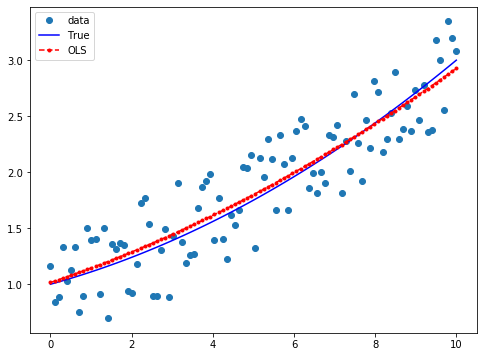

In [36]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.legend(loc='best');

(array([11.,  6., 16., 11., 15., 11., 17.,  7.,  3.,  3.]),
 array([0.69861848, 0.96332318, 1.22802789, 1.4927326 , 1.7574373 ,
        2.02214201, 2.28684672, 2.55155142, 2.81625613, 3.08096083,
        3.34566554]),
 <a list of 10 Patch objects>)

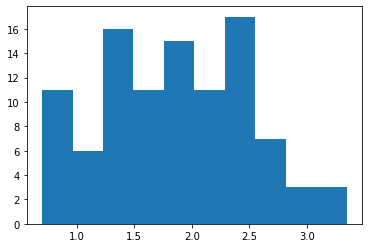

In [37]:
plt.hist(y)

よく'原因と結果が直線で表せる関係でないと線形回帰は使えない'という記述を見る。しかし、この説明だと最初は正しく理解していてもあるときから違う理解に代わってしまうことがよくある。パラメータについて線形とか変数について線形とかいう言い方もされる。$y=\beta_0+\beta_1 x^2$は線形の関数ではない。非線形だ。$x$について非線形だ。$x$の2乗を含むからである。ところがこれをパラメータの立場から見ると線形である。つまり、これは線形回帰モデルで回帰係数を推定できる対象となる。すでに見たとおりだ。しかし、統計の専門家は別として、これがややこしく、そのうちに理解が逆さになってしまうのだ。

statsmodelsのリファレンスにあるつぎの例は驚くほど良い例だと思う。$X$は$x$の多項式の部分とsinの部分で構成されている。これは直感的に訴えてくれる。これは、説明変数と被説明変数の間の関係が非線形である。しかし、線形結合であるので、つまりパラメータに対して線形なのだ。よって、OLSで解ける。sinが入っていると、なぜか変数について線形とかパラメータについて線形とか考えなくなる。sinはどう考えても非線形だ。それでもOLSで解ける。それは線形結合だからだ。

$X=\beta_0x+ \beta_1 \textrm{sin}(x)+ \beta_2 (x-5)^2+\beta_3$
$y=X+e$
$\beta_0=0.5,\beta_1=0.5,\beta_2=-0.02, \beta_3=5$としてデータを生成する。ノイズ($e$)は標準正規分布にしたがうとする。

In [38]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

# Fit and summary:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     235.9
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           6.22e-28
Time:                        16:03:20   Log-Likelihood:                -28.349
No. Observations:                  50   AIC:                             64.70
Df Residuals:                      46   BIC:                             72.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4521      0.023     19.337      0.0

結果はまずまずであり、回帰係数はどれも設定とほぼ似たような値になっている。

これは線形回帰の意味を正確に示している。線形という意味はデータが線形結合しているという意味であり、この場合にはそれぞれの説明変数のデータの和として$X$が生成されている。データ$y$を５％の信頼区間付きでプロットしてみるとよくわかる。最初に結果を数値として出力する。

In [39]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 0.4520786   0.59560817 -0.01803893  5.3991137 ]
Standard errors:  [0.02337839 0.09190319 0.00205264 0.15158634]
Predicted values:  [ 4.94814053  5.43969671  5.88640071  6.25579243  6.52712642  6.69478035
  6.76917874  6.7750802   6.74750971  6.7260041   6.74811622  6.84324518
  7.02780611  7.30253323  7.65235919  8.04889061  8.45507306  8.83127893
  9.14181821  9.36080219  9.47639696  9.49276764  9.42939409  9.31787044
  9.1967142   9.10503802  9.07612353  9.13195332  9.2795992   9.51006036
  9.79974219 10.11433276 10.41444023 10.66206476 10.82684182 10.89103099
 10.85243063 10.72473965 10.53530677 10.32063725 10.12039513  9.97088659
  9.8990949   9.91824719 10.02564122 10.20308942 10.41990697 10.6379533
 10.81789845 10.92568487]


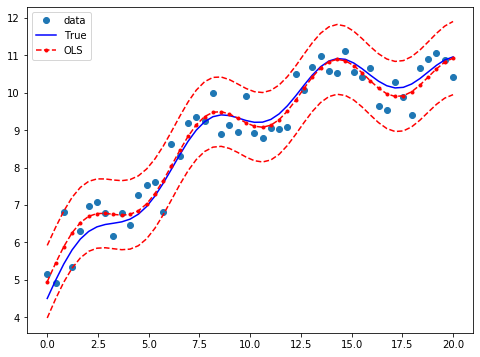

In [40]:
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best');

$y$はぐねぐねしているのに最小二乗法で解けている。説明変数の単なる和なので、説明変数がくねくねしていれば被説明変数もそれにしたがってくねくねしている。単に直線の足し算だけではないということだ。

例によって$y$の頻度図を作っておこう。

(array([ 3.,  0.,  3.,  7.,  2.,  2., 10.,  4.,  7., 12.]),
 array([ 4.9158124 ,  5.53646313,  6.15711385,  6.77776458,  7.39841531,
         8.01906604,  8.63971676,  9.26036749,  9.88101822, 10.50166895,
        11.12231967]),
 <a list of 10 Patch objects>)

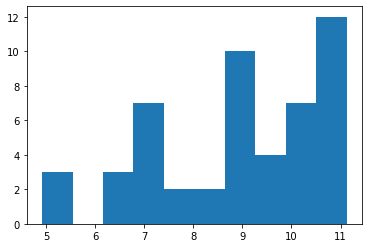

In [41]:
plt.hist(y)

この$y$の頻度図についても足し算になっているということだ。なるほど。

コーシー分布をつかってノイズを作ってみよう。金融の場合はこんなもんだ。


In [42]:
from scipy.stats import cauchy
nsample = 100
x = np.linspace(0, 10, 100)
beta = np.array([1, 0.1])
X = sm.add_constant(x)
y_true=np.dot(X, beta)
e = cauchy.rvs(loc=0,scale=0.1,size=nsample)
y = y_true + e

# Fit and summary:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     6.660
Date:                Tue, 14 Jul 2020   Prob (F-statistic):             0.0113
Time:                        16:03:21   Log-Likelihood:                -139.03
No. Observations:                 100   AIC:                             282.1
Df Residuals:                      98   BIC:                             287.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9157      0.195      4.699      0.0

Cond.No.は変わらないのに$p$値は大きく変わった。切片も回帰係数も再現性が弱くなった。$y$の頻度図を見てみる。

(array([ 1.,  1.,  0.,  1.,  0.,  1.,  0., 17., 69., 10.]),
 array([-5.19347253, -4.39966673, -3.60586093, -2.81205513, -2.01824933,
        -1.22444353, -0.43063773,  0.36316807,  1.15697387,  1.95077967,
         2.74458547]),
 <a list of 10 Patch objects>)

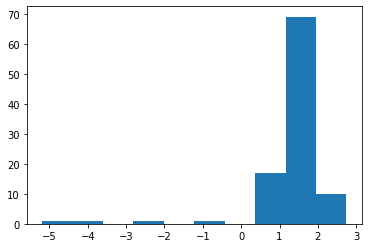

In [43]:
plt.hist(y)

ファットテイルで中心もずれている。実行するたびに大きく異なるノイズが生成されるので、何度も行ってみると面白い。


## データの特性の把握とモデル選択

### ダミー変数

数値ではないデータが得られたときにそれらを数値に変換して回帰分析をするときに、その変換されたデータをダミー変数という。その威力を簡単に見てみよう。

#### 人工的に作ったデータの例

人工データを作ってその有効性を調べてみよう。statsmodelsのリファレンスのcategoricalの例をみてみよう。

In [44]:
import string
string_var = [string.ascii_lowercase[0:5],   
              string.ascii_lowercase[5:10],           
              string.ascii_lowercase[10:15],          
              string.ascii_lowercase[15:20],          
              string.ascii_lowercase[20:25]]
string_var

['abcde', 'fghij', 'klmno', 'pqrst', 'uvwxy']

によって生成する。これを5倍に膨らます。

In [45]:
string_var *= 5
string_var

['abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy',
 'abcde',
 'fghij',
 'klmno',
 'pqrst',
 'uvwxy']

つぎにこの結果をソートする。

In [46]:
string_var = np.asarray(sorted(string_var))
string_var

array(['abcde', 'abcde', 'abcde', 'abcde', 'abcde', 'fghij', 'fghij',
       'fghij', 'fghij', 'fghij', 'klmno', 'klmno', 'klmno', 'klmno',
       'klmno', 'pqrst', 'pqrst', 'pqrst', 'pqrst', 'pqrst', 'uvwxy',
       'uvwxy', 'uvwxy', 'uvwxy', 'uvwxy'], dtype='<U5')

並べ替えた結果からカテゴリカル変数を作る。

In [47]:
design = sm.tools.categorical(string_var, drop=True)
design

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

被説明変数をつくってみよう。

In [48]:
y0= np.arange(10,60, step=2)
y0

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58])

In [49]:
y= np.floor(y0/10)
y

array([1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 4., 4.,
       4., 4., 4., 5., 5., 5., 5., 5.])

いよいよ回帰を行う。

In [50]:
X=design
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.965e+31
Date:                Tue, 14 Jul 2020   Prob (F-statistic):          1.88e-310
Time:                        16:03:22   Log-Likelihood:                 850.32
No. Observations:                  25   AIC:                            -1691.
Df Residuals:                      20   BIC:                            -1685.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   2.05e-16   4.88e+15      0.0

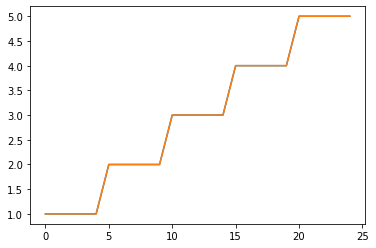

In [51]:
plt.plot(y)
plt.plot(results.fittedvalues)

R-squaredは1となりました。

#### Statsmodelsのサンプル

さらにダミー変数の役割が直感的に理解できるように、statsmodelsのサンプルを見てみよう。

50個の標本を生成する。groupsに0,1,2を設定する。それをもとにダミー変数を生成する。
説明変数xを0から20までの数値を50個に分割して生成する。それに３つのグループの内の最初のgroupsを取り除き加え、かつ定数(切片)を付加する。

$\beta$を1,3,-3,10としてy_trueを生成する。ノイズは標準正規乱数とする。

In [52]:
nsample = 50
groups = np.zeros(nsample, int) # data typeを整数(int)に指定
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [53]:
groups[20:40] = 1
groups[40:] = 2
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [54]:
#dummy = (groups[:,None] == np.unique(groups)).astype(float)
dummy = sm.categorical(groups, drop=True)
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [55]:
x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:])) # 2次元配列に変換
X = sm.add_constant(X, prepend=False) #定数は最初の列(True)ではなく、最後の列（False)に加える
beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

# Inspect the data:最初の５つのデータを確認する。
print(X[:5,:])
print(y_true[:5])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[10.         10.40816327 10.81632653 11.2244898  11.63265306]
[10.52672131  9.68801428 10.46562074 10.5924636  11.78660775]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


２つのダミー変数の影響のある部分と無い部分の3つのグループから構成されるy_trueを可視化する。

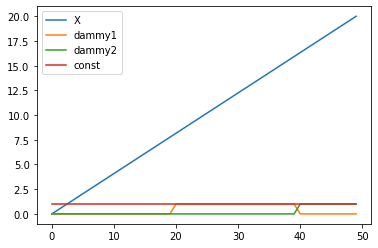

In [56]:
plt.plot(X[:,0],label='X')
plt.plot(X[:,1],label='dammy1')
plt.plot(X[:,2],label='dammy2')
plt.plot(X[:,3],label='const')
plt.legend()

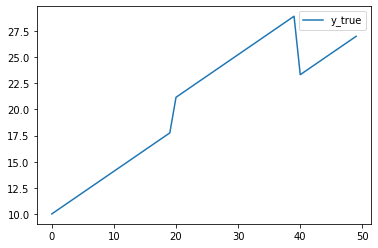

In [57]:
plt.plot(y_true,label='y_true')
plt.legend()

$X$と$\beta$の関係が見て取れる。

In [58]:
# Fit and summary:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     569.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.32e-36
Time:                        16:03:24   Log-Likelihood:                -69.899
No. Observations:                  50   AIC:                             147.8
Df Residuals:                      46   BIC:                             155.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0741      0.067     16.138      0.0

結果は良好であるのでグラフに描いてみよう。ダミー変数の利用により、３つのグループの変数が区別されている。

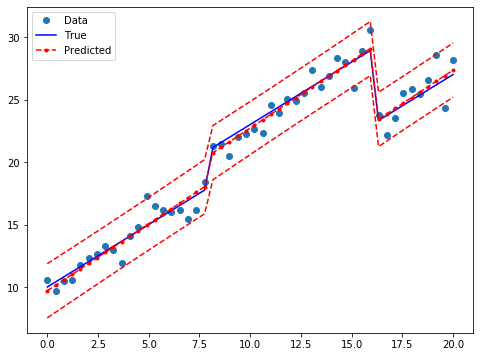

In [59]:
prstd, iv_l, iv_u = wls_prediction_std(res2)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

# 結合仮説の検定 
## F検定

ダミー変数の回帰係数がゼロだという仮説を検定してみる。それはすなわち$R \times \beta=$である。F検定から２つのグループが同じであるという仮説を非常に強く棄却している。また、この検定の仮説は数式を用いて表現することもできる。

In [60]:
R = [[0, 1, 0, 0], [0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[106.34026112]]), p=5.621657207113823e-18, df_denom=46, df_num=2>


数式を用いて帰無仮説を表現する。

In [62]:
# You can also use formula-like syntax to test hypotheses

print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[106.34026112]]), p=5.621657207114086e-18, df_denom=46, df_num=2>


### 構成割合の小さなグループの影響

statsmodelsのリファレンスのこの例も非常に良い例である。直感に訴えてくる。

あるグループまたは変数の影響を小さくしてみる。実際のデータを生成する際に$\beta_1=0.3$を小さくし、$\beta_2=-0.0$としてみる。つまり、帰無仮説の片方は明らかにゼロになる。そうすると先ほどのF検定の結果とは異なりp値は0.3である程度の大きさをもっている。これで帰無仮説を棄却できるとは言えない。さてこの際の表現方法であるが、一方の$\beta$は実際にゼロではなく0.3だ。実際のデータの生成においても帰無仮説は正しくない。ここで、統計学の主義について説明しておこう。統計学の仮説検定では帰無仮説を採択するという結論はないのだ。統計学では真理を明らかにすることが目的ではなく、数学的な誤謬を減らすことにある([仮説検定wiki参照](https://ja.wikipedia.org/wiki/%E4%BB%AE%E8%AA%AC%E6%A4%9C%E5%AE%9A))。したがって、この場合の結論は、棄却するに足る証拠はないとか、棄却するに足るには十分ではない、などの表現を用いる。そして今回は、その表現が実際に正しい。気を付ける必要があるのは実際に帰無仮説が棄却できない場合に、帰無仮説が正しいと思ってしまうことである。これは今回の例のようにかなり微妙なのである。

In [70]:
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()
print(res3.f_test(R))

<F test: F=array([[2.53578296]]), p=0.09022130876215792, df_denom=46, df_num=2>


In [71]:
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     571.1
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           2.17e-36
Time:                        16:23:50   Log-Likelihood:                -69.485
No. Observations:                  50   AIC:                             147.0
Df Residuals:                      46   BIC:                             154.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0697      0.066     16.207      0.0

株式市場では、よく価格がランダムウォークにしたがうという帰無仮説を立てる。これは金融理論の骨幹である。この帰無仮説を棄却できる場合はかなり稀である。しかし、だからと言って株価がランダムウォークにしたがうとは言えないのである。単に、今回は棄却するに十分な証拠がなかっただけなのである。

# 多重共線性

Longley(1967)のデータは高い多重共線性をもつことで知れている。これは非常に高い相関をもつデータである。これは回帰係数を計算する際にそれらを不安定にしてしまう。したがって、安定性を得るためにモデルの特性を若干変える必要がある。

In [72]:
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

# Fit and summary:

ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Tue, 14 Jul 2020   Prob (F-statistic):           4.98e-10
Time:                        16:26:23   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

C:\Users\moriya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\moriya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))
